### Differentiation
<br> Gives rate of change of the function
<br> Linear approximation can still be written as $f(x+h) \approx f(x) + f'(x) \; h$ 
<br> Using multi-variable taylor series the linear approximation can be written as a nxm array of partiel derivatives called the jacobian matrix

$$
f(x+h) \approx f(x) + 
\begin{bmatrix}
\frac{\partial f_0}{\partial x_0} & \frac{\partial f_0}{\partial x_1} & \cdots & \frac{\partial f_0}{\partial x_{m-1}} \\
\vdots & \vdots & \cdots & \vdots \\
\frac{\partial f_{n-1}}{\partial x_0} & \frac{\partial f_{n-1}}{\partial x_1} & \cdots & \frac{\partial f_{n-1}}{\partial x_{m-1}} \\
\end{bmatrix}
\begin{bmatrix}
h_0 \\
h_1 \\
\vdots \\
h_{m-1}
\end{bmatrix}
= f(x) + J(f;x) \; h
$$

If f has just a single compoent, then 

$$
f(x+h) \approx f(x) + 
\begin{pmatrix}
\frac{\partial f}{\partial x_0} & \frac{\partial f}{\partial x_1} & \cdots & \frac{\partial f}{\partial x_{m-1}}
\end{pmatrix}
\begin{bmatrix}
h_0 \\
h_1 \\
\vdots \\
h_{m-1}
\end{bmatrix}
$$

Derivative of a matrix time a vector: $f(x+h) \approx f(x) + f'(x) \; h$ 

$f(x) = A x \implies f(x+h) = A(x+h) = Ax + Ah \implies f'(x) = A$

Derivative of a Quadratic form:
<br> $ f(x) = x^T A x$
<br> Let $y = A x$ so $f(x,y(x)) = x^T y(x) = y(x)^T x$

$\begin{aligned}
f'(x,y(x)) &= \frac{\partial f}{\partial x} &+ &\frac{\partial f}{\partial y} y'(x) \\
&= y(x)^T &+ &x^T \; A \\
&= (Ax)^T &+ &x^T \; A &= x^T A^T + x^T A &= \boxed{x^T (A^T + A) = (x^T A x)'}
\end{aligned}$



### Gradient and steepest decent
<br> A different approach to linear solvers is to follow gradient to inflection point for solution. 
<br> $(\nabla f)^T = 0 \implies \nabla f = 0 \,(= 0^T \,)$ 
<br>Generic quadratic form: $f(x) = \frac{1}{2} x^T A x - b^T x + c$

and the gradient is: $\nabla f(x) = \frac{1}{2} A^T x + \frac{1}{2} A x - b$

**Symetric A matrix:** $A^T = A$ and the condition at the critical point is:

$\nabla f(x) = A x - b = 0$ 

Critical point of the quadratic coincides with the solution of symmetric linear system.

**Positive Definite:**
* When function is shapped like a bowl
* Critirical point is a minium
* must seek solution by moving "down" to critical point 

**Non-symetric A matrix:**
* gradient descent seeks the solution of $\frac{1}{2} (A^T + A) x = b$. 
<br>For non-square $A$, it can be helpful to multiply by $A^T$ to get __normal equations__ $A^T A x = A^T b$. 
<br>The matrix $A^T A$ is symmetric and positive definite, so descent methods can be applied:
<br>$\implies$__Least Squares solution__ (that minimixes the least squared error $|| A x - b ||^2$)

In [5]:
# Sample of finding best fit line
# y = m*x + b

import numpy as np 

x = np.array([2, 3, 5, 7, 9])
y = np.array([4, 5, 7, 10, 15])
A0 = np.column_stack([x, np.ones([5])])

# to get square normal system
A = np.dot(A0.T, A0)
b = np.dot(A0.T, y)

slope, intercept = np.linalg.solve(A, b)
print("Best fit line is y = %6.2f * x + %6.2f" %(slope, intercept))

Best fit line is y =   1.52 * x +   0.30


**Quadratic function and gradient**
* Ensures normal matric is symetric
* Solution found by minimizing quadratic form

$$ f(x) = \frac{1}{2} x^T A x - b^T x$$

In [6]:
# sample functions to compute quadratic function and gradient

def f(x,A,b):
    y = np.dot(A,x)
    return 0.5*np.dot(x,y) - np.dot(b,x)

def fxy(x,y):
    return 0.5*(168*x**2+52*x*y+5*y**2)-(263*x+41*y)

def grad_f(x):
    g0 = 168*x[0] + 26 * x[1] - 263
    g1 = 26*x[0] + 5*x[1] - 41
    return np.array([g0,g1])

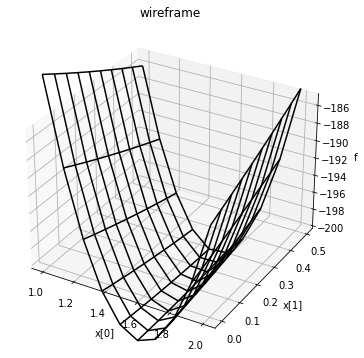

In [8]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)
x = np.linspace(1,2, 10)
y = np.linspace(0,0.5, 10)
X, Y = np.meshgrid(x, y)
Z = fxy(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_xlabel('x[0]')
ax.set_ylabel('x[1]')
ax.set_zlabel('f')
ax.set_zlim(bottom=-200,top=-185)
ax.set_title('wireframe');
plt.show(fig)

###Gradient Descent Method

**Finding solution via minimum**
* positive definie matrix since $A^T A$ is positive

**Steps**

1. Make initial guess `x[0]`
2. For given extimate `x[i]`
3. Compute gradient `grad_f(x[i])` to determine steepest directions
4. Move towards miniumum to get improved solution `x[i+1] = x[i] - c *grad_f(x[i])`
5. If `np.norm(x[i+1]-x[i]) > tol` repeat from step 2; else `return x[i+1]`


In [10]:
x0 = np.array([0,0])
A, b, f(x0,A,b), grad_f(x0)

(array([[168.,  26.],
        [ 26.,   5.]]),
 array([263.,  41.]),
 0.0,
 array([-263,  -41]))

In [11]:
def descent_update_const(x, c):
    return x - c*grad_f(x)

In [12]:
# previously solved to get [1.52, 0.30]
c = 0.01
n = 15
x = x0
for i in range(n):
    x = descent_update_const(x, c)
    print(x)

[2.63 0.41]
[0.735  0.1157]
[2.100118 0.328815]
[1.11642786 0.17634357]
[1.82497973 0.28725515]
[1.31432745 0.20839766]
[1.68207394 0.26625264]
[1.41696403 0.22560078]
[1.60780825 0.2559101 ]
[1.47015376 0.23508445]
[1.56917349 0.25109025]
[1.49767857 0.24055063]
[1.54903541 0.24912667]
[1.51188299 0.24392113]
[1.53850008 0.2486355 ]


### Eigenvalues, eigen vectors and stability
Is a linear system is solvable

* For non-singular $(Det(a) \neq 0)$: a unique solution will exist 
* For singular matrices, solution not possible



